In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
!which python

/Users/jyoti.islam/anaconda3/bin/python


In [2]:
df_schema = pd.read_csv("/Users/jyoti.islam/ds/data/developer_survey_2020/survey_results_schema.csv")
pd.set_option('display.max_columns', None)
df_schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


In [3]:
df_schema.columns

Index(['Column', 'QuestionText'], dtype='object')

In [4]:
df_schema.shape

(61, 2)

In [5]:
df = pd.read_csv("/Users/jyoti.islam/ds/data/developer_survey_2020/survey_results_public.csv")
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [6]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [7]:
df.shape

(64461, 61)

In [8]:
#finding first question
column_name = 'LanguageWorkedWith'
df_schema[df_schema['Column'] == column_name][df_schema.columns[-1]].values[0]

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [9]:
df['LanguageWorkedWith'].isna().sum()

7083

In [11]:
popular_languages = list(df.groupby(['LanguageWorkedWith']).mean().index)
all_languages = []
for language in popular_languages:
    data = map(lambda x: x.strip(), language.split(';'))
    all_languages.extend(list(data))
language_cnt = {}
for language in all_languages:
    if language not in language_cnt.keys():
        language_cnt[language] = 1
    else:
        language_cnt[language] += 1
lang_df = pd.DataFrame(list(language_cnt.items()), columns = ["Language_Name", "Count"]) 
lang_df.sort_values(by='Count', ascending = False, inplace=True)
lang_df.head()

,Language_Name,Count
9,JavaScript,9800
7,HTML/CSS,9150
14,SQL,8424
13,Python,8335
8,Java,7899


In [12]:
lang_df['Language_Name'].to_list()

['JavaScript',
 'HTML/CSS',
 'SQL',
 'Python',
 'Java',
 'Bash/Shell/PowerShell',
 'C++',
 'C',
 'C#',
 'PHP',
 'TypeScript',
 'Go',
 'Kotlin',
 'Assembly',
 'Ruby',
 'Swift',
 'Rust',
 'R',
 'VBA',
 'Objective-C',
 'Dart',
 'Perl',
 'Scala',
 'Haskell',
 'Julia']

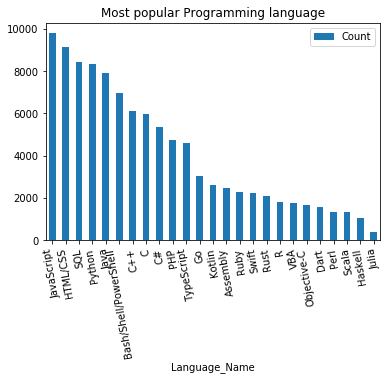

In [13]:
# Draw a vertical bar chart for Which language is most popular in the programming industry?
lang_df.plot.bar(x="Language_Name", y="Count", rot=100, title="Most popular Programming language");
plt.show(block=True);

In [14]:
#finding second question
column_name = 'CompTotal'
df_schema[df_schema['Column'] == column_name][df_schema.columns[-1]].values[0]

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [15]:
#finding devtype question
column_name = 'DevType'
df_schema[df_schema['Column'] == column_name][df_schema.columns[-1]].values[0]

'Which of the following describe you? Please select all that apply.'

In [16]:
#finding country question
column_name = 'Country'
df_schema[df_schema['Column'] == column_name][df_schema.columns[-1]].values[0]

'Where do you live?'

In [17]:
#finding salary question
column_name = 'ConvertedComp'
df_schema[df_schema['Column'] == column_name][df_schema.columns[-1]].values[0]

'Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.'

In [18]:
df['CompTotal'].isna().sum()

29635

In [19]:
df['ConvertedComp'].isna().sum()

29705

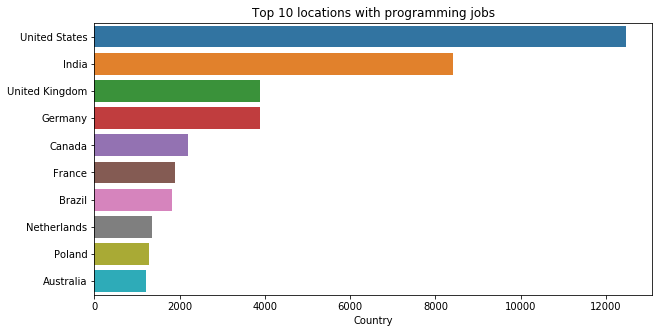

In [20]:
#visualizattion for Which location offers the most jobs for the developers?
countries = df.Country.value_counts()[:10]
f, ax = plt.subplots(1, 1, figsize=(10,5))
g = sns.barplot(x=countries, y=countries.index)
t = g.set(title="Top 10 locations with programming jobs")

In [21]:
s = df[df['Country'] == 'China']
s.shape

(371, 61)

In [23]:
salary_df = df[['CompFreq', 'CompTotal', 'ConvertedComp', 'Country', 'DevType']]
salary_df.shape

(64461, 5)

In [24]:
salary_df.dropna(subset =['ConvertedComp', 'Country', 'DevType'], inplace = True)
salary_df.head()

/Users/jyoti.islam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CompFreq,CompTotal,ConvertedComp,Country,DevType
7,Yearly,116000.0,116000.0,United States,"Developer, back-end;Developer, desktop or ente..."
9,Yearly,25000.0,32315.0,United Kingdom,"Database administrator;Developer, full-stack;D..."
10,Yearly,31000.0,40070.0,United Kingdom,"Developer, back-end;Developer, desktop or ente..."
11,Monthly,1100.0,14268.0,Spain,"Designer;Developer, front-end"
12,Monthly,3000.0,38916.0,Netherlands,"Designer;Developer, back-end"


In [25]:
dev_types = list(salary_df.groupby(['DevType']).mean().index)
print("total dev types: ", len(dev_types))
all_dev_types = []
for dev in dev_types:
    data = map(lambda x: x.strip(), dev.split(';'))
    all_dev_types.extend(list(data))
dev_cnt = {}
for devtype in all_dev_types:
    if devtype not in dev_cnt.keys():
        dev_cnt[devtype] = 1
    else:
        dev_cnt[devtype] += 1
dev_df = pd.DataFrame(list(dev_cnt.items()), columns = ["DevType", "Count"]) 
dev_df.sort_values(by='Count', ascending = False, inplace=True)
dev_df.head()

total dev types:  6155


,DevType,Count
5,"Developer, back-end",4249
9,"Developer, full-stack",3863
8,"Developer, front-end",2953
6,"Developer, desktop or enterprise applications",2543
3,Database administrator,2113


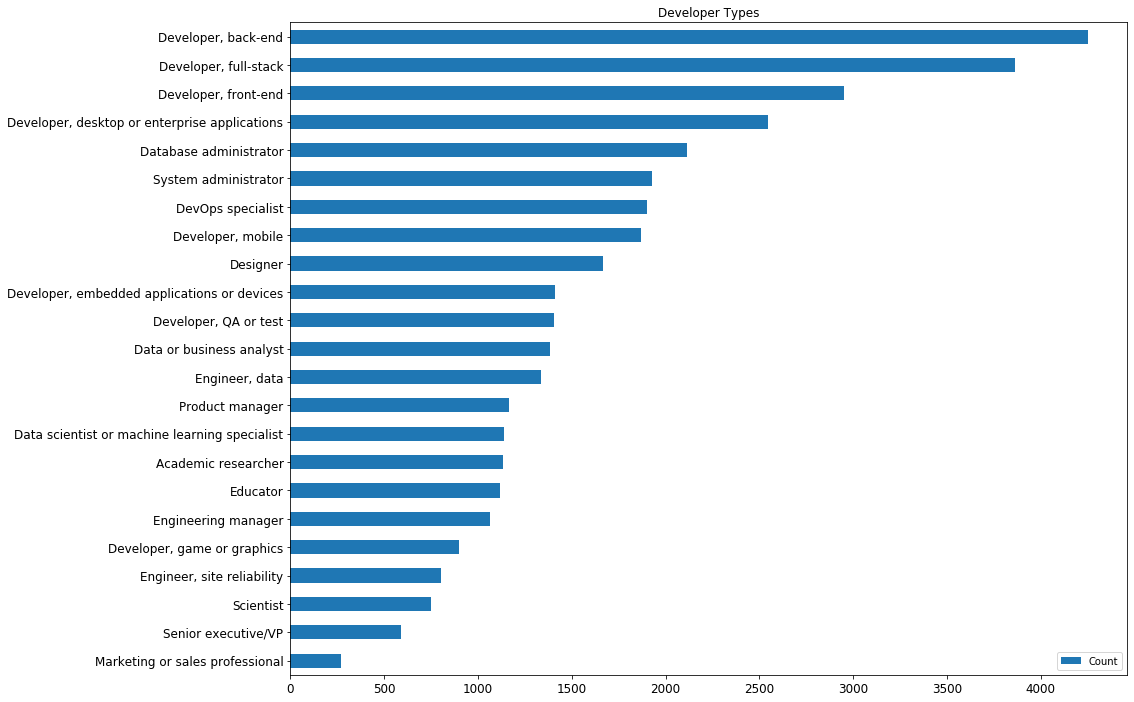

In [26]:
# visualizattion for Which category has the most number of jobs?
dev_df = pd.DataFrame.from_dict(dev_cnt, orient='index', dtype=None, columns = ['Count'])
dev_df.sort_values('Count', ascending=True,inplace=True)
dev_df.plot(kind = 'barh', figsize = (15,12), fontsize = 12, title = 'Developer Types');

In [27]:
salary_df.shape

(34367, 5)

In [28]:
dev_types_list = dev_df.index.tolist()
dev_salary_dict = {key: [] for key in dev_types_list}

In [29]:
dev_salary_dict

{'Marketing or sales professional': [],
 'Senior executive/VP': [],
 'Scientist': [],
 'Engineer, site reliability': [],
 'Developer, game or graphics': [],
 'Engineering manager': [],
 'Educator': [],
 'Academic researcher': [],
 'Data scientist or machine learning specialist': [],
 'Product manager': [],
 'Engineer, data': [],
 'Data or business analyst': [],
 'Developer, QA or test': [],
 'Developer, embedded applications or devices': [],
 'Designer': [],
 'Developer, mobile': [],
 'DevOps specialist': [],
 'System administrator': [],
 'Database administrator': [],
 'Developer, desktop or enterprise applications': [],
 'Developer, front-end': [],
 'Developer, full-stack': [],
 'Developer, back-end': []}

In [30]:
for key, value in enumerate(salary_df['DevType']):
    developers = value.split(';')
    salary = salary_df.iloc[key, 2]
    
    for developer in developers:
        dev_salary_dict[developer].append(salary)


In [31]:
dev_salary_df = pd.DataFrame(list(dev_salary_dict.items()), columns = ["Dev_Type", "Salary"]) 

In [32]:
dev_salary_df['avg_salary'] = 0

In [33]:
import statistics
for index, row in dev_salary_df.iterrows():
    total = 0
    for element in row["Salary"]:
        total = total + float(element)
    dev_salary_df.at[index , 'avg_salary'] = total/len(row["Salary"])

dev_salary_df.sort_values(by='avg_salary', ascending = True, inplace=True)
dev_salary_df.head()

,Dev_Type,Salary,avg_salary
7,Academic researcher,"[21620.0, 65000.0, 48644.0, 1920000.0, 90000.0...",79984
15,"Developer, mobile","[32315.0, 63564.0, 90482.0, 117000.0, 108100.0...",90740
6,Educator,"[94359.0, 124092.0, 21620.0, 35028.0, 130000.0...",95941
20,"Developer, front-end","[40070.0, 14268.0, 66000.0, 38778.0, 31764.0, ...",99119
12,"Developer, QA or test","[108576.0, 31764.0, 74970.0, 16488.0, 130000.0...",102792


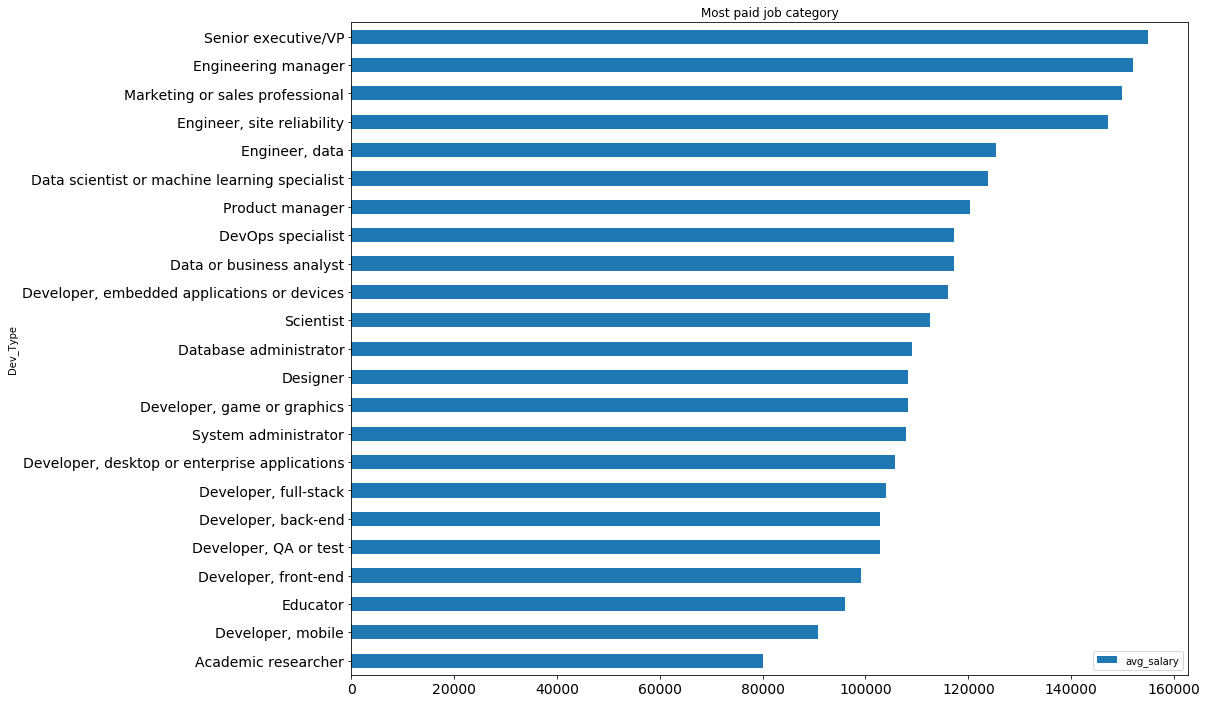

In [35]:
# Draw a horizontal bar chart for What is the average salary of different job categories?
dev_salary_df.plot(kind = 'barh', x="Dev_Type", y="avg_salary", title="Most paid job category", fontsize = 14, figsize = (15,12));
plt.show(block=True);